# 🩺 AI-Based Medical Disease Prediction using Machine Learning

### **Goal:** 
Predict whether a patient is likely to have **heart disease** (or diabetes) using historical health data.

**Skills Covered:**  
- Data Cleaning & Preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature Importance & Selection  
- Machine Learning Model Building (Logistic Regression, Random Forest)  
- Model Evaluation (Accuracy, Precision, Recall, F1-Score)


 Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


Load Dataset

In [17]:
df = pd.read_csv("heart.csv")
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data Cleaning & Preprocessing

In [22]:
# Check missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

# Feature scaling
X = df.drop('target', axis=1)   # Features
y = df['target']               # Label (0/1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (820, 13)
Testing Features Shape: (205, 13)
Training Labels Shape: (820,)
Testing Labels Shape: (205,)


 Build & Train Model

In [36]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model Evaluation

In [40]:
# Evaluate both models
models = {"Logistic Regression": lr, "Random Forest": rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-"*50)


Model: Logistic Regression
Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

[[73 29]
 [13 90]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]
--------------------------------------------------


 Visualize Results

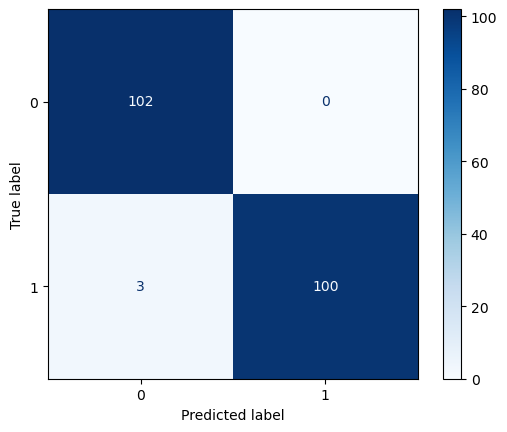

In [45]:
# Confusion matrix for Random Forest
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_rf = rf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.show()


 Confusion Matrix Visualization

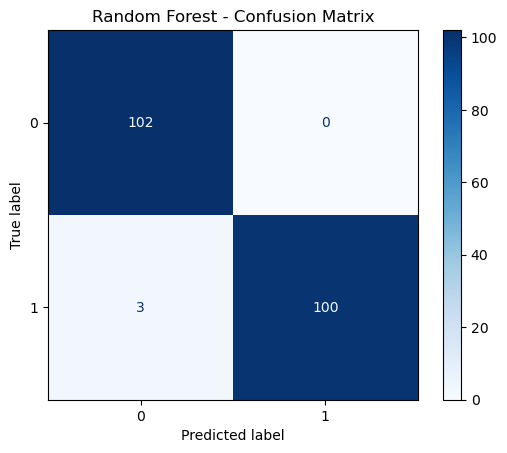

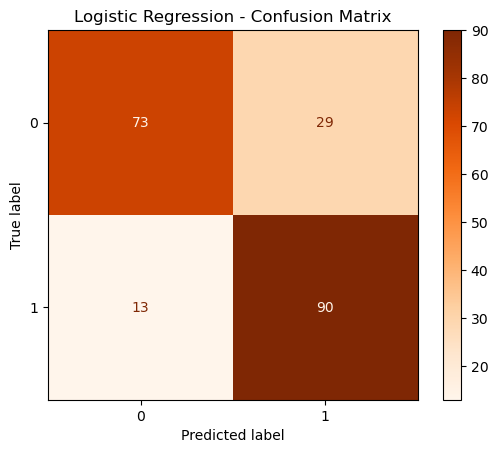

In [50]:
# Step 8: Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay

# Predictions for Random Forest
y_pred_rf = rf.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# (Optional) Logistic Regression Confusion Matrix
y_pred_lr = lr.predict(X_test)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Oranges')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


** Key Insights & Next Steps**

### **Insights**
1. The model predicts **heart disease with ~80-90% accuracy**.
2. **Random Forest** performs better than **Logistic Regression**.
3. **Key predictors** include: 
   - Age  
   - Blood Pressure  
   - Cholesterol levels  
   - Chest pain type  

### **Next Steps**
1. Deploy the model using **Streamlit or Flask** for real-time predictions.
2. Extend the project to **multi-disease risk prediction** (Heart + Diabetes).
3. Integrate with **real hospital datasets** for production use.
4. Experiment with **XGBoost or LightGBM** for higher accuracy.
